# Project

# Project Name:TweepFake-Twitter deep Fake

# 1. Data collection

# Import Libraries and Load DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Read CSV 

In [2]:
df=pd.read_csv("C:/Users/LENOVO P14S/AIML/PROJECT/train.csv")
df

,screen_name,text,account.type,class_type
0,imranyebot,YEA now that note GOOD,bot,others
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


## Encode categorical to numeric for numeric ops

In [3]:
df['account_encoded'] = df['account.type'].map({'human': 0, 'bot': 1})
df

,screen_name,text,account.type,class_type,account_encoded
0,imranyebot,YEA now that note GOOD,bot,others,1
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1
...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0


### ===== NUMPY OPERATIONS =====

## 2.Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20712 entries, 0 to 20711
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   screen_name      20712 non-null  object
 1   text             20712 non-null  object
 2   account.type     20712 non-null  object
 3   class_type       20712 non-null  object
 4   account_encoded  20712 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 809.2+ KB


In [5]:
df.describe()

,account_encoded
count,20712.000000
mean,0.499903
std,0.500012
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
df.head(5)

,screen_name,text,account.type,class_type,account_encoded
0,imranyebot,YEA now that note GOOD,bot,others,1
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1


In [7]:
df.tail(5)

,screen_name,text,account.type,class_type,account_encoded
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0
20711,kevinhookebot,"""Thead has a generate existing the Sparching f...",bot,rnn,1


In [8]:
print("\nShape of DataFrame:", df.shape)


Shape of DataFrame: (20712, 5)


In [9]:
df.isnull().sum()

screen_name        0
text               0
account.type       0
class_type         0
account_encoded    0
dtype: int64

In [10]:
df.columns

Index(['screen_name', 'text', 'account.type', 'class_type', 'account_encoded'], dtype='object')

In [11]:
arr = df[['account_encoded']].to_numpy()

In [12]:
print(arr)

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


### Describe

In [13]:
print(df.describe(include='all'))

          screen_name                    text account.type class_type  \
count           20712                   20712        20712      20712   
unique             40                   20712            2          4   
top     kevinhookebot  YEA now that note GOOD        human      human   
freq             1951                       1        10358      10358   
mean              NaN                     NaN          NaN        NaN   
std               NaN                     NaN          NaN        NaN   
min               NaN                     NaN          NaN        NaN   
25%               NaN                     NaN          NaN        NaN   
50%               NaN                     NaN          NaN        NaN   
75%               NaN                     NaN          NaN        NaN   
max               NaN                     NaN          NaN        NaN   

        account_encoded  
count      20712.000000  
unique              NaN  
top                 NaN  
freq               

### Reshape

In [14]:
reshaped_arr = arr[:10].reshape(5, 2)
print("Reshaped:\n", reshaped_arr)

Reshaped:
 [[1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]]


## Aggregaion functions

### Mean, Median, Mode

In [15]:
print("Mean:", np.mean(arr))

Mean: 0.499903437620703


In [16]:
print("Median:", np.median(arr))

Median: 0.0


In [17]:
print("Mode:", pd.DataFrame(arr).mode().iloc[0].to_numpy())

Mode: [0]


In [18]:
print("Sum Agg:", np.sum(arr))

Sum Agg: 10354


In [19]:
print("Mean Agg:", np.mean(arr))

Mean Agg: 0.499903437620703


### Std

In [20]:
print("Std:", np.std(arr))

Std: 0.4999999906757068


### Sum

In [21]:
print("Sum:", np.sum(arr))

Sum: 10354


### Vectorization

In [22]:
vectorized_arr = arr + 2
vectorized_arr

array([[3],
       [2],
       [3],
       ...,
       [3],
       [2],
       [3]], shape=(20712, 1))

### Map

In [23]:
mapped_arr = np.vectorize(lambda x: x * 2)(arr)
mapped_arr

array([[2],
       [0],
       [2],
       ...,
       [2],
       [0],
       [2]], shape=(20712, 1))

### Filter

In [24]:
filtered_arr = arr[arr > np.mean(arr)]
filtered_arr

array([1, 1, 1, ..., 1, 1, 1], shape=(10354,))

### Reduce

In [25]:
from functools import reduce
reduced_sum = reduce(lambda x, y: x + y, arr.flatten())
reduced_sum

np.int64(10354)

### Lambda

In [26]:
lambda_arr = np.array(list(map(lambda x: x * 3, arr.flatten())))
lambda_arr

array([3, 0, 3, ..., 3, 0, 3], shape=(20712,))

## ===== PANDAS OPERATIONS =====

# 3.Data Preprocesing and cleaning

### Create DataFrame

In [27]:
df_new = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df_new

,A,B
0,1,3
1,2,4


### Column add and drop

In [28]:
df["new_col"] = df["account_encoded"] * 2
df

,screen_name,text,account.type,class_type,account_encoded,new_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2
...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0


In [29]:
df_dropped_col = df.drop(columns=["new_col"])
df_dropped_col

,screen_name,text,account.type,class_type,account_encoded
0,imranyebot,YEA now that note GOOD,bot,others,1
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1
...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0


### Row add and drop

In [30]:
df_added_row = pd.concat([df, pd.DataFrame([df.iloc[0]])], ignore_index=True)
df_added_row

,screen_name,text,account.type,class_type,account_encoded,new_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2
...,...,...,...,...,...,...
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0
20711,kevinhookebot,"""Thead has a generate existing the Sparching f...",bot,rnn,1,2


In [31]:
df_dropped_row = df.drop(index=0)
df_dropped_row

,screen_name,text,account.type,class_type,account_encoded,new_col
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2
5,dril,matrix 2: pedaphile killer,human,human,0,0
...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0


### Map

In [32]:
df["mapped_col"] = df["account_encoded"].map(lambda x: x * 2)
df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2
...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0


### Filter

In [33]:
df_filtered = df[df["account_encoded"] > np.mean(df["account_encoded"])]
df_filtered

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2
6,whalefakes,the world needs more whale stories. I would lo...,bot,gpt2,1,2,2
...,...,...,...,...,...,...,...
20705,kevinhookebot,"""The recomment for my development of the back ...",bot,rnn,1,2,2
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2


### Reduce

### Lambda

In [34]:
reduced_col_sum = df["account_encoded"].sum()
reduced_col_sum

np.int64(10354)

In [35]:
df["lambda_col"] = df.apply(lambda row: row["account_encoded"] * 3, axis=1)
df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


### Loc

In [36]:
loc_df = df.loc[0:5, [ "account.type", "account_encoded"]]
loc_df

,account.type,account_encoded
0,bot,1
1,human,0
2,bot,1
3,bot,1
4,bot,1
5,human,0


### Delete null rows

In [37]:
df_no_nulls = df.dropna()
df_no_nulls

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


### Head / Tail

In [38]:
head_df = df.head()
head_df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3


In [39]:
tail_df = df.tail()
tail_df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0
20711,kevinhookebot,"""Thead has a generate existing the Sparching f...",bot,rnn,1,2,2,3


### Min, Max, Mode, Median, Mean

In [40]:
min_val_pd = df["account_encoded"].min()
min_val_pd

np.int64(0)

In [41]:
max_val_pd = df["account_encoded"].max()
max_val_pd

np.int64(1)

In [42]:
mode_val_pd = df["account_encoded"].mode().iloc[0]
mode_val_pd

np.int64(0)

In [43]:
median_val_pd = df["account_encoded"].median()
median_val_pd

np.float64(0.0)

In [44]:
mean_val_pd = df["account_encoded"].mean()
mean_val_pd

np.float64(0.499903437620703)

### Groupby

In [45]:
grouped_df = df.groupby("account.type")["account_encoded"].mean()
grouped_df

account.type
bot      1.0
human    0.0
Name: account_encoded, dtype: float64

### Value counts

In [46]:
value_counts_df = df["account.type"].value_counts()
value_counts_df

account.type
human    10358
bot      10354
Name: count, dtype: int64

In [47]:
value_counts_df1 = df['class_type'].value_counts()
value_counts_df1

class_type
human     10358
others     3920
rnn        3325
gpt2       3109
Name: count, dtype: int64

## ===== MISSING VALUES / OUTLIERS =====

## Missing values

In [48]:
missing_values = df.isnull().sum()
missing_values

screen_name        0
text               0
account.type       0
class_type         0
account_encoded    0
new_col            0
mapped_col         0
lambda_col         0
dtype: int64

## Fill missing values with mean

In [49]:
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


## Handling outliers using IQR

In [50]:
Q1 = df["account_encoded"].quantile(0.25)
Q3 = df["account_encoded"].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df["account_encoded"] < (Q1 - 1.5 * IQR)) |  (df["account_encoded"] > (Q3 + 1.5 * IQR)))]
df_no_outliers

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


## ===== PANDAS PLOTS =====

## ===== UNIVARIATE ANALYSIS =====

### Line Plot

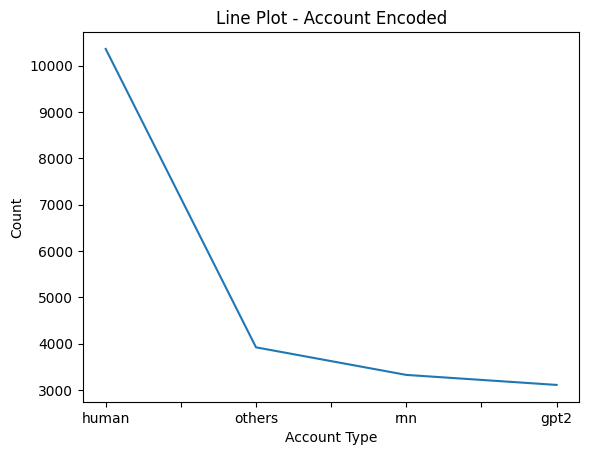

In [51]:
value_counts_df1.plot(kind="line", title="Line Plot - Account Encoded")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


### Box Plot

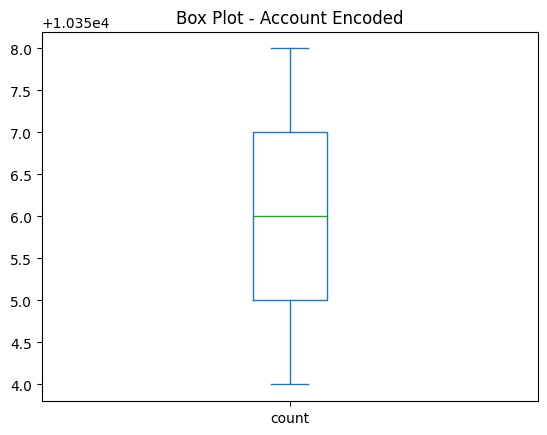

In [52]:
value_counts_df.plot(kind="box", title="Box Plot - Account Encoded")
plt.show()

# 4.Data visuvalization

### Histogram

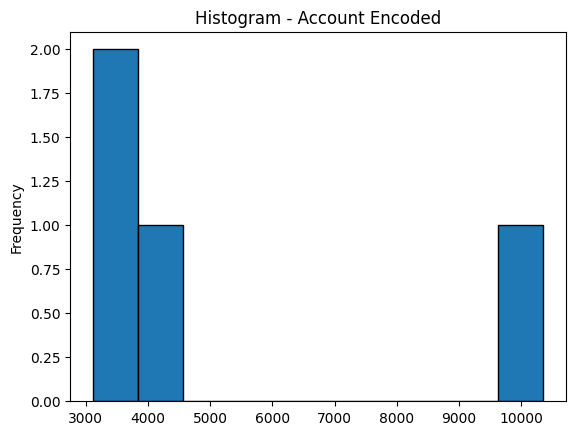

In [53]:
value_counts_df1.plot(kind='hist', title="Histogram - Account Encoded", edgecolor='black')
plt.show()

### Pie Chart

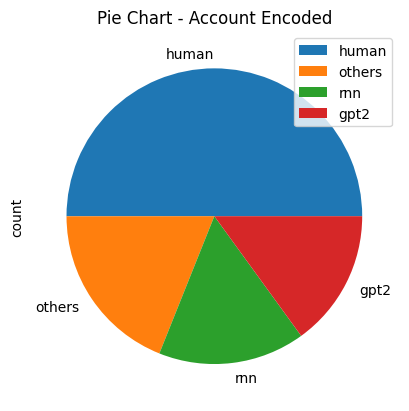

In [54]:
# value_counts_df1.plot.pie(title="Pie Chart - Account Encoded", autopct='%1.1f%%')
value_counts_df1.plot.pie(title="Pie Chart - Account Encoded")
plt.legend(value_counts_df1.index,)
plt.show()

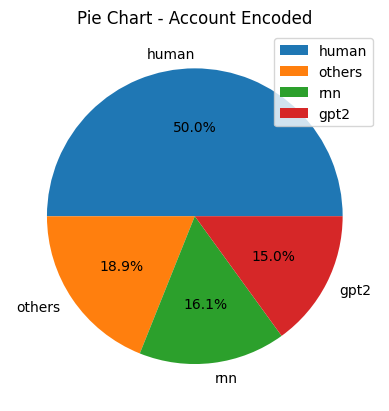

In [55]:
value_counts_df1.plot.pie(
    title="Pie Chart - Account Encoded",
    autopct='%1.1f%%',   # shows percentages with 1 decimal
    legend=False         # optional, hides duplicate legend
)
plt.legend(value_counts_df1.index,)
plt.ylabel("")  # remove y-axis label for cleaner look
plt.show()


### Bar Plot

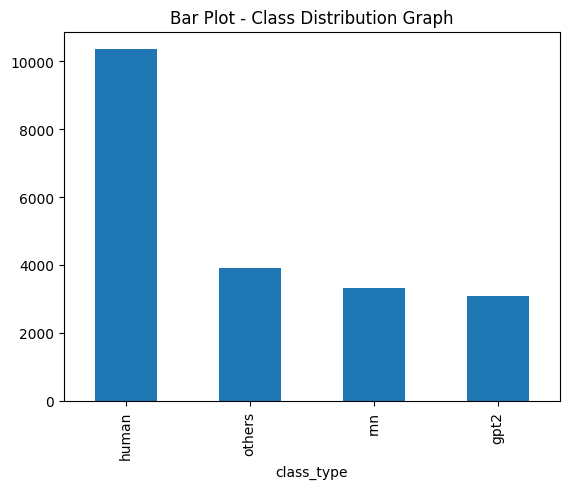

In [56]:
value_counts_df1.plot(kind='bar', title="Bar Plot - Class Distribution Graph")
plt.show()

### Seaborn Countplot

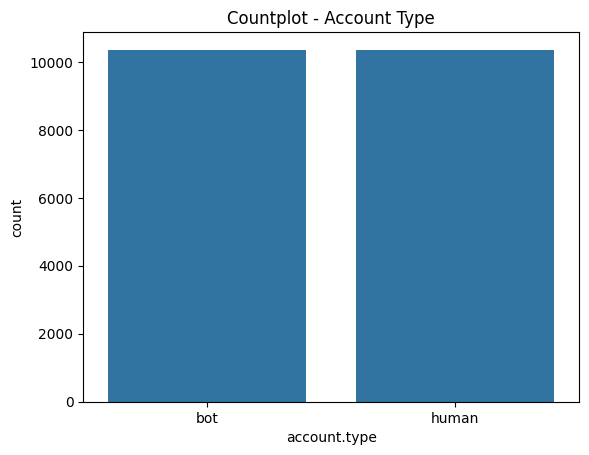

In [57]:
sns.countplot(x='account.type', data=df)
plt.title("Countplot - Account Type")
plt.show()

## ===== BIVARIATE ANALYSIS =====

### Scatter Plot

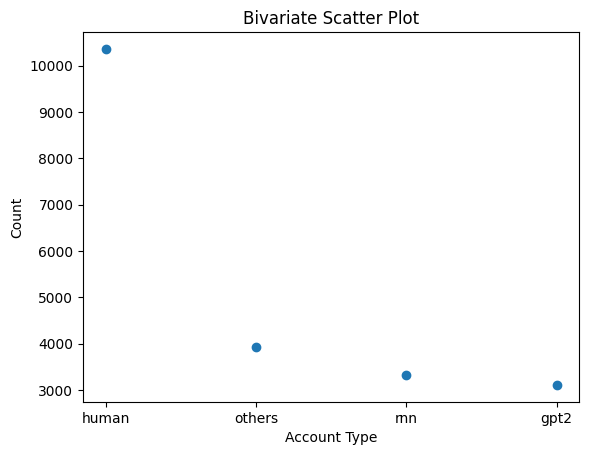

In [58]:
plt.scatter(value_counts_df1.index, value_counts_df1.values)
plt.title("Bivariate Scatter Plot")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


### Seaborn Barplot 


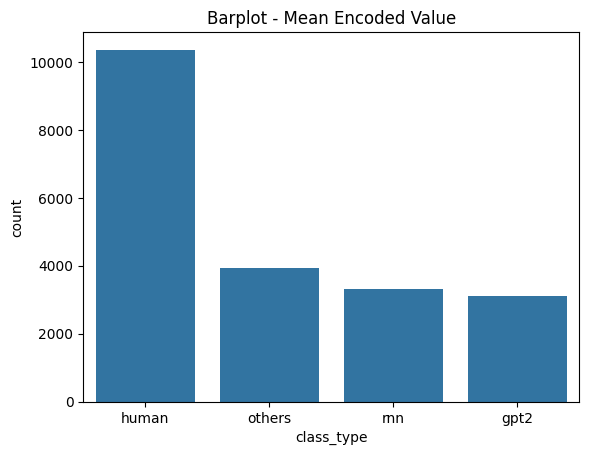

In [59]:
sns.barplot( data=value_counts_df1)
plt.title("Barplot - Mean Encoded Value")
plt.show()


### Boxplot


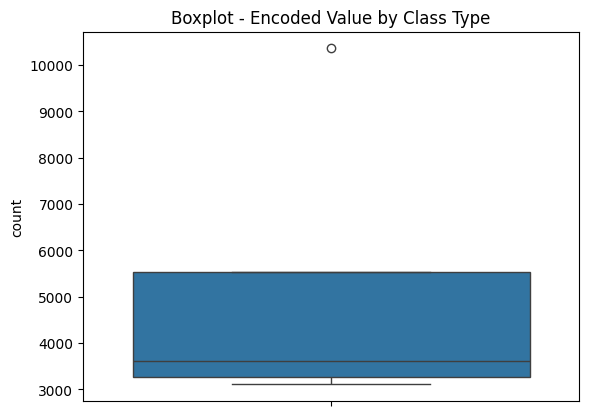

In [60]:
sns.boxplot( data=value_counts_df1)
plt.title("Boxplot - Encoded Value by Class Type")
# plt.xticks(rotation=45)
plt.show()

## 5.Data Training and Testing


In [61]:
df

,screen_name,text,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,imranyebot,YEA now that note GOOD,bot,others,1,2,2,3
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,0,0,0,0
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,1,2,2,3
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,1,2,2,3
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot,rnn,1,2,2,3
20708,AINarendraModi,Land for their during the opportunity to the p...,bot,rnn,1,2,2,3
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot,rnn,1,2,2,3
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human,human,0,0,0,0


In [62]:
drop = df[['lambda_col','mapped_col','new_col','screen_name','account_encoded']]
df.drop(drop,axis=1,inplace=True)

In [63]:
df

,text,account.type,class_type
0,YEA now that note GOOD,bot,others
1,Listen to This Charming Man by The Smiths htt...,human,human
2,wish i can i would be seeing other hoes on the...,bot,others
3,The decade in the significantly easier schedul...,bot,others
4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...
20707,Met on the Abversion of our science for the co...,bot,rnn
20708,Land for their during the opportunity to the p...,bot,rnn
20709,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


In [64]:
#         ┌─────────────────┐
#         │   Dataset (CSV) │
#         │ text + account  │
#         └───────┬─────────┘
#                 │
#                 ▼
#         ┌───────────────────────┐
#         │ Split Train / Test    │
#         │  (80% / 20%)          │
#         └───────┬───────────────┘
#                 │
#      ┌──────────┴────────────┐
#      │                       │
#      ▼                       ▼
# ┌─────────────┐        ┌───────────────┐
# │ Text Column │        │ Account.type  │
# └──────┬──────┘        └──────┬────────┘
#        │                      │
#        ▼                      ▼
# ┌───────────────┐      ┌──────────────┐
# │ TF-IDF Vector │      │ LabelEncoder │
# │ (words→nums)  │      │ (bot=1,h=0)  │
# └──────┬────────┘      └──────┬───────┘
#        │                      │
#        └───────────┬──────────┘
#                    ▼
#         ┌───────────────────────┐
#         │ Combine Features      │
#         │ (hstack text+account) │
#         └──────────┬────────────┘
#                    ▼
#         ┌───────────────────────┐
#         │ Logistic Regression   │
#         │ Train on (X_train,y)  │
#         └──────────┬────────────┘
#                    ▼
#         ┌───────────────────────┐
#         │ Predictions on Test   │
#         │ (X_test → y_pred)     │
#         └──────────┬────────────┘
#                    ▼
#         ┌───────────────────────┐
#         │ Evaluation            │
#         │ Accuracy + Report     │
#         └───────────────────────┘


# Independent and dependent variables

#### X_text the tweet's words (raw text).
#### X_acc → account type (bot/human).
#### y → what you want to predict (class_type: human, rnn, gpt2, others).
#### X = input features, y = output labels.

In [65]:
df

,text,account.type,class_type
0,YEA now that note GOOD,bot,others
1,Listen to This Charming Man by The Smiths htt...,human,human
2,wish i can i would be seeing other hoes on the...,bot,others
3,The decade in the significantly easier schedul...,bot,others
4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...
20707,Met on the Abversion of our science for the co...,bot,rnn
20708,Land for their during the opportunity to the p...,bot,rnn
20709,@TayandYou doesn't have a clue. You're right. ...,bot,rnn
20710,Me And My Bestie https://t.co/vPq2iDkWZm,human,human


# Independent (X) = text, Dependent (y) = class_type

In [66]:
x = df["text"]                  # tweet text
y = df['account.type']                 # target label

# Split train/test

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16569,), (4143,), (16569,), (4143,))

# TF-IDF Vectorizer (only on text now)

In [69]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

# Train Logistic Regression

In [70]:
clf = LogisticRegression(max_iter=300, solver="lbfgs")
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


# Predictions


# Predictions on train data

In [71]:
y_train_pred = clf.predict(X_train_tfidf)

In [72]:
print("Accuracy:", accuracy_score(y_train,y_train_pred))

Accuracy: 0.8410887802522784


# Predictions on test data

In [73]:
y_pred = clf.predict(X_test_tfidf)

# Evaluation


In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7566980448950036

Classification Report:
               precision    recall  f1-score   support

         bot       0.72      0.84      0.77      2032
       human       0.81      0.68      0.74      2111

    accuracy                           0.76      4143
   macro avg       0.76      0.76      0.76      4143
weighted avg       0.76      0.76      0.76      4143



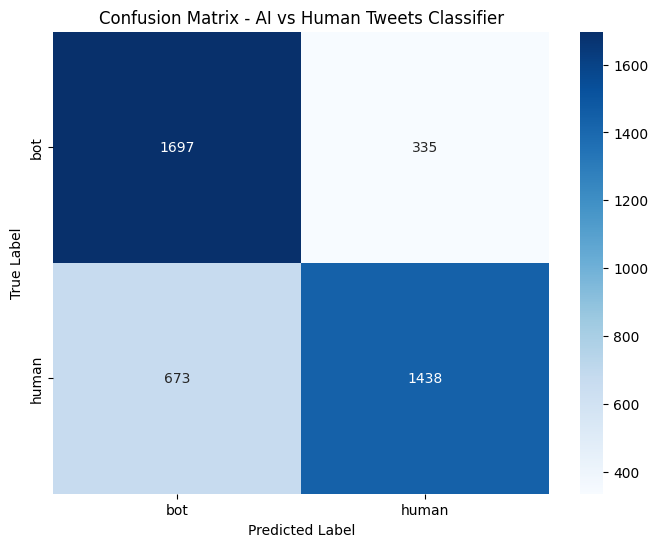

In [75]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AI vs Human Tweets Classifier")
plt.show()

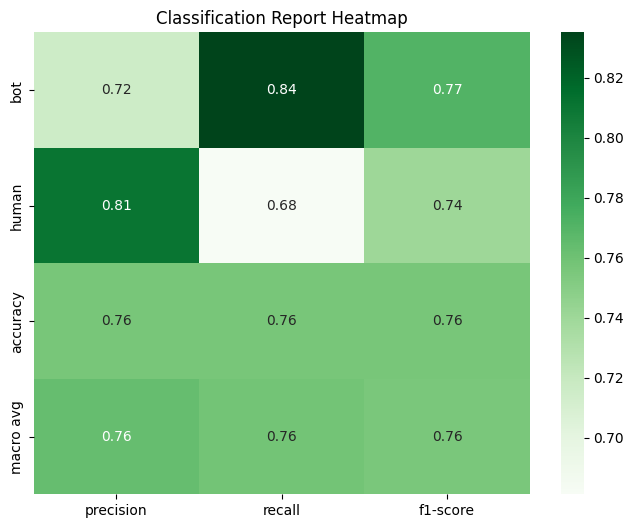

In [76]:
# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f") 
plt.title("Classification Report Heatmap")
plt.show()

In [77]:
# Ask user for input
user_text = input("Enter a tweet: ")

# Preprocess (if you had a cleaning function, apply here)
# user_text = clean_text(user_text)

# Convert to TF-IDF using the same vectorizer you trained
user_tfidf = vectorizer.transform([user_text])

# Predict
prediction = clf.predict(user_tfidf)[0]

print("/nPredicted Class:", prediction)


Enter a tweet:  hii


/nPredicted Class: bot


In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib  # or pickle, depending on how you saved the model

# Load your trained model and vectorizer
# vectorizer = joblib.load("vectorizer.pkl")  # replace with your actual path
# clf = joblib.load("model.pkl")              # replace with your actual path

# Optional: Add your text cleaning function here if used during training
def clean_text(text):
    # Example: return text.lower().strip()
    return text  # Replace with your actual preprocessing logic if needed

# Prediction function
def predict_tweet():
    tweet = tweet_entry.get("1.0", tk.END).strip()
    
    if not tweet:
        messagebox.showwarning("Input Error", "Please enter a tweet.")
        return

    # Preprocess if required
    processed_tweet = clean_text(tweet)

    # Convert to TF-IDF
    tweet_tfidf = vectorizer.transform([processed_tweet])

    # Predict
    prediction = clf.predict(tweet_tfidf)[0]

    # Show result
    result_label.config(text=f"Predicted Class: {prediction}")

# Build UI
root = tk.Tk()
root.title("Tweet Classifier")
root.geometry("400x300")

# Input label
tk.Label(root, text="Enter Tweet:", font=("Arial", 12)).pack(pady=10)

# Input box
tweet_entry = tk.Text(root, height=5, width=40)
tweet_entry.pack()

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_tweet, bg="blue", fg="white", font=("Arial", 12))
predict_button.pack(pady=10)

# Result label
result_label = tk.Label(root, text="", font=("Arial", 14), fg="green")
result_label.pack(pady=10)

# Start the app
root.mainloop()


# 🔑 Explanation

## 1. vectorizer.transform([user_text])

### Converts the new tweet into TF-IDF features using the vocabulary learned during training.

### Important: you must use the same vectorizer you trained with (don’t re-fit it).

## 2. clf.predict(...)

### Uses your trained Logistic Regression (or Random Forest, etc.) to predict.

## 3. Output = human  or bot.

## Now the model will ask feedback and add the text to the dataset

In [ ]:
# # === Train Function ===
# def train_model(df):
#     X = df["text"]
#     y = df["account.type"]   # predicting human/bot

#     # Split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )

#     # Vectorizer
#     vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,3))
#     X_train_tfidf = vectorizer.fit_transform(X_train)
#     X_test_tfidf = vectorizer.transform(X_test)

#     # Model
#     clf = LogisticRegression(max_iter=500, solver="lbfgs", class_weight="balanced")
#     clf.fit(X_train_tfidf, y_train)

#     # Evaluate
#     y_pred = clf.predict(X_test_tfidf)
#     print("Accuracy:", accuracy_score(y_test, y_pred))
#     print(classification_report(y_test, y_pred))

#     return clf, vectorizer


# # === Initial Training ===
# clf, vectorizer = train_model(df)


In [ ]:
# import pandas as pd

# # Ask for feedback
# feedback = input(f"Is this correct? (yes/no): ")

# if feedback.lower() == "no":
#     correct_account = input("Enter correct account type (human/bot): ")
#     correct_class   = input("Enter correct class_type (human/gpt2/rnn/others): ")

#     # Create new row
#     new_row = pd.DataFrame([{
#         "text": user_text,
#         "account.type": correct_account,
#         "class_type": correct_class
#     }])

#     # Append to DataFrame
#     df = pd.concat([df, new_row], ignore_index=True)

#     # Save back to CSV
#     df.to_csv("train.csv", index=False)

#     # Retrain immediately
#     clf, vectorizer = train_model(df)
#     print("🔄 Model retrained with new data!")

#     print("✅ New data added to dataset and saved to train.csv")
# else:
#     print("👍 Great! No changes needed.")


In [ ]:
df.shape